# Atividade 1

Foi analisado um conjunto de dezoito dados x e y, que forneceram os seguintes resultados:

In [ ]:
somatorio_xi = 152.70
somatorio_yi = 671.00
somatorio_xiyi = 5380.84
somatorio_xi2 = 1312.6764
somatorio_yi2 = 31231.00
media_x = 8.4833
media_y = 37.2778
n = 18

Calcule o intervalo de previsão de 95% para x=9.

In [ ]:
x = 9

## Resolução

Encontrando sxy, sxx e syy

In [ ]:
sxy = somatorio_xiyi - somatorio_xi * somatorio_yi / n
sxx = somatorio_xi2 - pow(somatorio_xi,2) / n
syy = somatorio_yi2 - pow(somatorio_yi,2) / n

print(f'sxy: {sxy}')
print(f'sxx: {sxx}')
print(f'syy: {syy}')

sxy: -311.47666666666646
sxx: 17.271400000000313
syy: 6217.6111111111095


Equação da reta:

In [ ]:
b1 = sxy / sxx
b0 = media_y - b1 * media_x

print(f'Y = {b0} + {b1}x')

Y = 190.26771432850165 + -18.034245438508798x


Aplicando em determinado x:

In [ ]:
reg_aplicada = b0 + b1 * x
print(f"Resultado para x = {x}: {reg_aplicada}")

Resultado para x = 9: 27.95950538192247


Calcular variancia e desvio padrão estimado

In [ ]:
#Calcular SQE, SQT e SQR
sqe = syy - b1 * sxy
sqt = syy
sqr = sqt - sqe

#Calcular variancia e desvio padrão estimados
s2 = sqe / (n-2)
s = pow(s2, 1/2)

#Calcular variancia no x
sy = s  *pow(((1 / n) + (x - media_x) * (x - media_x) / sxx), 1/2)

print(f'Desvio padrão estimado da reta: {s}')
print(f'Variancia estimada na reta: {s2}')
print(f'Variancia estimada em x = {x}: {sy}')

Desvio padrão estimado da reta: 6.12558393173589
Variancia estimada na reta: 37.52277850474093
Variancia estimada em x = 9: 1.6323665879699925


t crítico

In [ ]:
from scipy.stats import t
alpha = 0.05  # nível de significia = 5% 
df = n - 2 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
ta2=v

In [ ]:
intervalo_previsao = ([reg_aplicada-ta2*pow((s2+sy*sy),1/2),reg_aplicada+ta2*pow((s2+sy*sy),1/2)])
print(intervalo_previsao)

[14.520676908189614, 41.39833385565532]


# Atividade 2

Foi analisado um conjunto de dezoito dados x e y, que forneceram os seguintes resultados:

In [19]:
somatorio_xi = 152.70
somatorio_yi = 671.00
somatorio_xiyi = 5380.84
somatorio_xi2 = 1312.6764
somatorio_yi2 = 31231.00
media_x = 8.4833
media_y = 37.2778
n = 18

Calcule os intervalos de confiança do valor esperado de três amostras com um nível de confiança de, pelo menos, 97%. As amostras adotam os seguintes valores x1=7, x2=8 e x3=9:

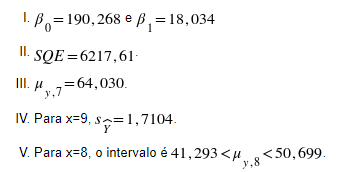

## Resolução

In [23]:
x1 = 7
x2 = 8
x3 = 9

Considerando que o nível de confiança é 100(1 - k * alpha)%, onde k é o número de observações simultâneas.

$100(1-k\alpha) \% \approx 97 \%$ 

$(1-k\alpha) = 0,97 $ 

$1-3\alpha = 0,97 $ 

$\alpha = \frac{0.03}{3} = 0,01$

In [21]:
alpha = 0.01

Cada observação deve ter alpha = 0.01, ou seja, 99% de confiança.

In [26]:
from scipy.stats import t
df = n - 2 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
ta2=v

ta2

2.9207816223499967

In [32]:
#Calcular variancia no x
sy_x1 = s  *pow(((1 / n) + (x1 - media_x) * (x1 - media_x) / sxx), 1/2)
sy_x2 = s  *pow(((1 / n) + (x2 - media_x) * (x2 - media_x) / sxx), 1/2)
sy_x3 = s  *pow(((1 / n) + (x3 - media_x) * (x3 - media_x) / sxx), 1/2)

sy_x1, sy_x2, sy_x3

(2.620032781508452, 1.609986924578677, 1.6323665879699925)

Aplicando a regressão (atividade anterior):

In [33]:
reg_aplicada_x1 = b0 + b1 * x1
reg_aplicada_x2 = b0 + b1 * x2
reg_aplicada_x3 = b0 + b1 * x3

Intervalos:

In [35]:
#IC do valor esperado para várias observações x=7 8 e 9 
intervalo_previsao_x1 = ([reg_aplicada_x1 - ta2*pow((s2 +sy_x1 * sy_x1),1/2),reg_aplicada_x1 + ta2*pow((s2 + sy_x1 * sy_x1),1/2)])
intervalo_previsao_x2 = ([reg_aplicada_x2 - ta2*pow((s2 +sy_x2 * sy_x2),1/2),reg_aplicada_x2 + ta2*pow((s2 + sy_x2 * sy_x2),1/2)])
intervalo_previsao_x3 = ([reg_aplicada_x3 - ta2*pow((s2 +sy_x3 * sy_x3),1/2),reg_aplicada_x3 + ta2*pow((s2 + sy_x3 * sy_x3),1/2)])

print(f'O intervalo de confiança para y, x=7= {intervalo_previsao_x1}')
print(f'O intervalo de confiança para y, x=8= {intervalo_previsao_x2}')
print(f'O intervalo de confiança para y, x=9= {intervalo_previsao_x3}')

O intervalo de confiança para y, x=7= [44.56862976462767, 83.48736275325248]
O intervalo de confiança para y, x=8= [27.494608224685404, 64.49289341617714]
O intervalo de confiança para y, x=9= [9.443639014487836, 46.4753717493571]


In [36]:
print(f'sqe: {sqe}')

sqe: 600.3644560758548


In [39]:
print('Y esperado para x = 7: ', b0 + b1 * 7)

Y esperado para x = 7:  64.02799625894008


In [38]:
print(f'variancia para x = 9: {sy_x3}')

variancia para x = 9: 1.6323665879699925


# Atividade 5

Um conjunto de dados em que:

x= Largura da fissura da pálpebra (isto é, a largura horizontal da abertura do olho, em cm).
y = Área da Superfície Ocular (ASO) em cm2.

Foram verificados e apresentam uma relação linear.

Calcule o t critico para um nível de confiança de 95%.

In [41]:
#Dados x
x = [0.40, 0.42, 0.48, 0.51, 0.57, 0.60, 0.70, 0.75, 0.75, 0.78, 0.84, 
    0.95, 0.99, 1.03, 1.12, 1.15, 1.20, 1.25, 1.25, 1.28, 1.30, 1.34, 1.37, 
    1.40, 1.43, 1.46, 1.49, 1.55, 1.58, 1.60]
#Dados y
y= [1.02, 1.21, 0.88, 0.98, 1.52, 1.83, 1.50, 1.80, 1.74, 1.63, 2.00, 
    2.80, 2.48, 2.47, 3.05, 3.18, 3.76, 3.68, 3.82, 3.21, 4.27, 3.12, 3.99,
    3.75, 4.10, 4.18, 3.77, 4.34, 4.21, 4.92] 

In [43]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit() #
print(modelo.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     418.3
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           2.25e-18
Time:                        18:41:52   Log-Likelihood:                -6.2045
No. Observations:                  30   AIC:                             16.41
Df Residuals:                      28   BIC:                             19.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3977      0.168     -2.367      0.0

Calculando o t critico para nível de 95% de confiança:

In [45]:
from scipy.stats import t
alpha = 0.05
df = len(x) - 2 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
ta2=v

ta2

2.048407141795244

In [48]:
print(f't de teste (20.453) é maior que o t crítico ({ta2}). \n Rejeito a hipótese nula de que B0 é igual a 0.')

t de teste (20.453) é maior que o t crítico (2.048407141795244). 
 Rejeito a hipótese nula de que B0 é igual a 0.


# Atividade 6

Considere o seguinte conjunto de dados, em que x = pH e y = arsênio removido (%) por um determinado processo.

In [54]:
xa = [7.01, 7.11, 7.12, 7.24, 7.94, 7.94, 8.04, 8.05, 8.07, 8.90, 8.94, 8.95, 8.97, 8.98, 9.85, 9.86, 9.86, 9.87]
ya= [60, 67 , 66, 52, 50, 45, 52, 48, 40, 23, 20, 40, 31, 26, 9, 22, 13, 7]

Estime os parâmetros da reta de regressão usando o software computacional e considerando que sy = 1,61, calcule o intervalo de confiança da porcentagem de arsênico removido quando o pH vale 8,0. Utilize um nível de confiança de 99 %.

In [55]:
xa = sm.add_constant(xa)
modelo1 = sm.OLS(ya, xa).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     149.7
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           1.55e-09
Time:                        19:09:46   Log-Likelihood:                -57.105
No. Observations:                  18   AIC:                             118.2
Df Residuals:                      16   BIC:                             120.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        190.2683     12.587     15.116      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [59]:
b0 = modelo1.params[0]
b1 = modelo1.params[1]

Y = b0 + b1 * 8.0
Y

45.99432973972384